<a href="https://colab.research.google.com/github/Drew128/Iowa_liquor_sales-EDA-/blob/stage/Iowa_liquor_sales(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
%%bigquery --project project_name df
SELECT 
  *
FROM `bigquery-public-data.iowa_liquor_sales.sales`
LIMIT 100000

In [15]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-19607500040,2019-05-24,3514,Karen's Spirits and Wine,328 2nd Ave S,Fort Dodge,50501,POINT (-94.192501 42.502311),94,WEBSTER,1041300,American Sloe Gins,434,LUXCO INC,33717,Paramount Sloe Gin,12,1000,5.42,8.13,2,16.26,2.00,0.52
1,INV-20485000040,2019-07-08,4070,Grieder Beverage Depot,708 13th St,Belle Plaine,52208,POINT (-92.278 41.897054),6,BENTON,1041300,American Sloe Gins,434,LUXCO INC,33717,Paramount Sloe Gin,12,1000,5.42,8.13,2,16.26,2.00,0.52
2,INV-00052500097,2016-08-31,2565,Hy-Vee Food Store / Spencer,819 N Grand Ave,Spencer,51301,POINT (-95.14506 43.145897),21,CLAY,1070000,Cocktails / RTD,395,PROXIMO,58842,Jose Cuervo Coconut Pineapple,6,1750,8.20,12.30,3,12.30,5.25,1.38
3,INV-00074900026,2016-08-31,3666,Target Store T-1771 / Cedar Rapids,3400 Edgewood Rd SW,Cedar Rapids,52404,POINT (-91.716111 41.944272),57,LINN,1070000,Cocktails / RTD,395,PROXIMO,58893,Jose Cuervo Sparkling Paloma 4pk Cans,6,800,3.88,5.82,1,34.92,0.80,0.21
4,INV-00016600084,2016-08-29,2573,Hy-Vee Food Store / Muscatine,2400 2nd Ave,Muscatine,52761,POINT (-91.035138 41.451349),70,MUSCATINE,1031000,American Vodka,297,Laird & Company,35918,Five O'clock Vodka,6,1750,7.20,10.80,3,64.80,5.25,1.38


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
invoice_and_item_number    100000 non-null object
date                       100000 non-null object
store_number               100000 non-null object
store_name                 100000 non-null object
address                    99698 non-null object
city                       99698 non-null object
zip_code                   99698 non-null object
store_location             90279 non-null object
county_number              99221 non-null object
county                     99221 non-null object
category                   98812 non-null object
category_name              98233 non-null object
vendor_number              100000 non-null object
vendor_name                100000 non-null object
item_number                100000 non-null object
item_description           100000 non-null object
pack                       100000 non-null int64
bottle_volume_ml           100000 non-null int64


In [79]:
import pandas as pd

# check null values in data

pd.isnull(df).any()

invoice_and_item_number    False
date                       False
store_number               False
store_name                 False
address                     True
city                        True
zip_code                    True
store_location              True
county_number               True
county                      True
category                    True
category_name               True
vendor_number              False
vendor_name                False
item_number                False
item_description           False
pack                       False
bottle_volume_ml           False
state_bottle_cost          False
state_bottle_retail        False
bottles_sold               False
sale_dollars               False
volume_sold_liters         False
volume_sold_gallons        False
dtype: bool

In [89]:
# info about columns
for column in df.columns:
  print(f'{column: <25} had a    {df[column].nunique(): <6} unique values    type: {df.dtypes[column]}')

invoice_and_item_number   had a    100000 unique values    type: object
date                      had a    1869   unique values    type: object
store_number              had a    1808   unique values    type: object
store_name                had a    1868   unique values    type: object
address                   had a    2776   unique values    type: object
city                      had a    730    unique values    type: object
zip_code                  had a    436    unique values    type: object
store_location            had a    1464   unique values    type: object
county_number             had a    108    unique values    type: object
county                    had a    199    unique values    type: object
category                  had a    80     unique values    type: object
category_name             had a    79     unique values    type: object
vendor_number             had a    150    unique values    type: object
vendor_name               had a    210    unique values    type:

In [90]:
from collections import Counter

date = df['date'].unique()
date.sort()
# days delay between records & it`s frequency 
# 1 day delay means that we have day per day dates
Counter(abs(date[i]-date[i+1]).days for i, v in enumerate(date[:-1]))

Counter({1: 1436, 2: 33, 3: 189, 4: 200, 5: 10})

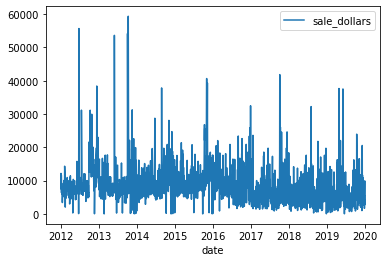

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

sum_by_date = df[['date', 'sale_dollars']].groupby('date').sum()
sns.lineplot(data=sum_by_date)

In [165]:
sum_by_date = df[['date', 'sale_dollars']]
sum_by_date['year'] = pd.to_datetime(sum_by_date['date']).dt.year
sum_by_date['month'] = pd.to_datetime(sum_by_date['date']).dt.month
sum_by_date['week'] = pd.to_datetime(sum_by_date['date']).dt.weekday_name

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



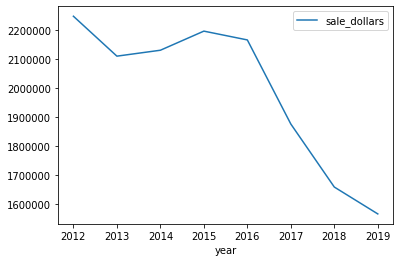

In [149]:
year_sesonality = sum_by_date[['year', 'sale_dollars']].groupby('year').sum()
sns.lineplot(data=year_sesonality)

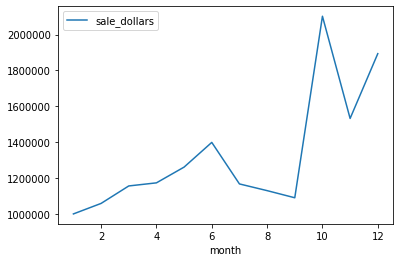

In [198]:
month_sesonality = sum_by_date[['month', 'sale_dollars']].groupby('month').sum()
sns.lineplot(data=month_sesonality)

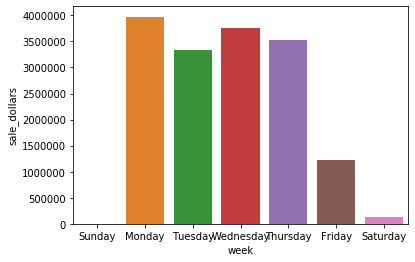

In [207]:
week_sesonality = sum_by_date[['week', 'sale_dollars']].groupby('week').sum()
week_sesonality['week'] = week_sesonality.index
sns.barplot(x=week_sesonality['week'], y=week_sesonality['sale_dollars'], order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])